In [ ]:

import os
import tarfile
import urllib.request
import pandas as pd
import numpy as np
#importing the sklearn built-in datasets:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import matplotlib as mpl

In [ ]:
#importing the data:
mnist = fetch_openml("mnist_784",version=1,as_frame=False)

In [ ]:
#exploring the data:
print(type(mnist))
print(mnist.keys())
print(mnist.data)
#the data points (rows of the bunch frame["data"] are binary descripitions of the numbers images)
print(np.sqrt(784))
#the targets are categories that correspond to numbers from 0 to 9
print(mnist.target)

In [ ]:
#as mnist data is pre-prepared only asignemnt of X,y is needed:
X=mnist["data"]
y=mnist["target"]
#X is a two dimensional array = 70000 data points with 784 features:
print(X.shape)
#X is a one dimensional array = 70000 data points with 1 feature - which is a category:
print(y.shape)

<function matplotlib.pyplot.show(close=None, block=None)>

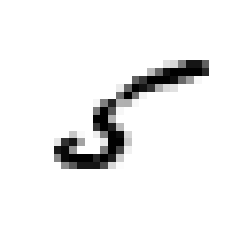

In [93]:
#visualizing the data:
some_digit = X[11]
some_digit_img=some_digit.reshape(28,28)
plt.imshow(some_digit_img,cmap=mpl.cm.binary)
plt.axis("off")
plt.show

In [ ]:
#checking the correct data to target relationship:
print(y[0])
print(type(y[0]))
#the machine learning model does not operate on stirng type data hence the need of conversion to int:
y = y.astype(np.uint8)
print(type(y[0]))


In [ ]:
#spliting the data into TRAIN AND TEST sets:

X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [ ]:
#simplified problem - binary classifier:
y_train_5 = y_train == 5
y_test_5 = y_test == 5

In [ ]:
#Training the model:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

In [ ]:
print(X_train[0].shape)

In [ ]:
print(some_digit.shape)
print(sgd_clf.predict([some_digit]))
#the digit is correctly rcognized as 5.

In [ ]:
#cross validation for measuring the models performance:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
for train_index, test_index in skfolds.split(X_train,y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

In [ ]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [ ]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

In [ ]:
#the model only prforms that "well" because 90% of data is not-5
#a better approach to analyzing the resutls is the CONFUSION MATRIX - tp,fp,tn,fn - true/false,positive/negative

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
#cross_val_predict returns the predictions results:
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)
#actual matrix:
print(confusion_matrix(y_train_5,y_train_pred))
#perfect prediction matrix:
'''
y_train_pred=y_train_5
print(confusion_matrix(y_train_5,y_train_pred))
'''



In [ ]:
#understanding the confusion matrix : PRECISION/RECALL
from sklearn.metrics import precision_score,recall_score,f1_score
print(precision_score(y_train_5,y_train_pred))
print(recall_score(y_train_5,y_train_pred))
print(f1_score(y_train_5,y_train_pred))

In [ ]:
from sklearn.metrics import precision_recall_curve
y_scores = sgd_clf.decision_function([some_digit])
print(y_scores)
threshold = 0
y_some_digit_pred = (y_scores>threshold)
print(y_some_digit_pred)
threshold = 8000
y_some_digit_pred = (y_scores>threshold)
print(y_some_digit_pred)

y_scores =  cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train_5,y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)       
    plt.grid(True)                             
    plt.axis([-50000, 50000, 0, 1])       

In [ ]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show() 

In [ ]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [ ]:
#ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5,y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)  

plot_roc_curve(fpr,tpr)
plt.show()

In [ ]:
#choosing a different model:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [ ]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [ ]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])

In [87]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

In [90]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)

[[5577    0   22    5    8   43   36    6  225    1]
 [   0 6400   37   24    4   44    4    7  212   10]
 [  27   27 5220   92   73   27   67   36  378   11]
 [  22   17  117 5227    2  203   27   40  403   73]
 [  12   14   41    9 5182   12   34   27  347  164]
 [  27   15   30  168   53 4444   75   14  535   60]
 [  30   15   42    3   44   97 5552    3  131    1]
 [  21   10   51   30   49   12    3 5684  195  210]
 [  17   63   48   86    3  126   25   10 5429   44]
 [  25   18   30   64  118   36    1  179  371 5107]]


In [91]:
def plot_confusion_matrix(matrix):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

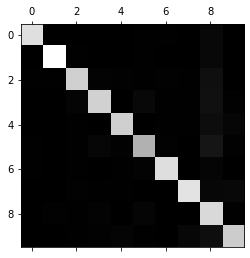

In [92]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

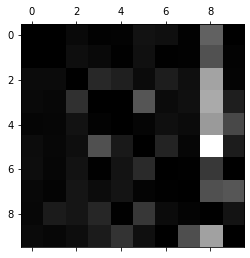

In [95]:
row_sums= conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx = conf_mx/row_sums
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.show()


In [97]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train %2 == 1)
y_train_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train, y_train_multilabel)

KNeighborsClassifier()

In [102]:
some_digit = X[11]
print(knn_clf.predict([some_digit]))
some_digit = X[2]
print(knn_clf.predict([some_digit]))
y_train_knn_pred = cross_val_predict(knn_clf,X_train,y_train_multilabel,cv=3)
print(f1_score(y_train_multilabel,y_train_knn_pred,average="macro"))

[[False  True]]
[[False False]]
0.976410265560605
